In [1]:
import pandas as pd
import numpy as np 

from utils import *
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30,15]


df shape:  (3000, 9)

rows with null values:  Int64Index([1551, 1552], dtype='int64')
rows that arent twitter:  1

dropped one row, fixed other null by dropping platform col, as unneeded

type of friends col:  int32

 country breakdown:  GB    2991
GG       5
JE       2
IM       1
Name: location.country, dtype: int64

df shape:  (2999, 8)


E:\Projects\bitbucket\fancy-a-challenge-william\utils.py:16: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  combined_df = pd.concat([csv_df,txt_df])


,author.properties.friends,author.properties.status_count,author.properties.verified,content.body,location.country,location.latitude,location.longitude,properties.sentiment
0,1689,22566.0,False,Can't believe I'm missing Love Island 😩,GB,51.570448,0.457135,1.0
1,114,1377.0,False,Last tweet about future wedding..... if I actu...,GB,52.969744,-1.172266,1.0
2,568,8375.0,False,"How many times does he wonna say the phrase ""i...",GB,51.394369,0.026299,-1.0
3,1845,19394.0,False,...even better if time travel were invented an...,GB,51.648544,-3.804292,-1.0
4,1617,17922.0,False,@GreenAlty @ShakeyStephens My Mum in mid 80s p...,GB,53.543471,-2.653238,0.0


,author.properties.friends,author.properties.status_count,location.latitude,location.longitude,properties.sentiment
count,2999.000000,2.999000e+03,2999.000000,2999.000000,2999.000000
mean,1320.079693,3.513996e+04,52.750163,-1.607843,-0.258419
std,8246.171997,1.291825e+05,1.655964,1.641746,0.781440
min,0.000000,2.000000e+00,49.187014,-7.817143,-1.000000
25%,260.500000,3.427500e+03,51.497043,-2.675644,-1.000000
50%,526.000000,1.143500e+04,52.200984,-1.396467,0.000000
75%,1081.500000,3.046100e+04,53.690849,-0.182814,0.000000
max,333028.000000,1.702464e+06,58.166389,1.403889,1.000000


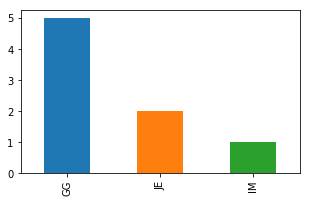

In [2]:
combined_df = preprocess_values(load_combined_df())
combined_df.head()
plt.rcParams['figure.figsize'] = [5,3]
combined_df['location.country'][combined_df['location.country']!='GB'].value_counts().plot(kind='bar')
combined_df.describe()

In [3]:
#googling these lon/lats show GG means Guersney.  (could also be done with google reverse geocoding api.)
combined_df[combined_df['location.country']=='GG']

,author.properties.friends,author.properties.status_count,author.properties.verified,content.body,location.country,location.latitude,location.longitude,properties.sentiment
536,2749,6387.0,False,@Jigman101 @VirtualAstro sadly not Lemon Drizz...,GG,49.571653,-2.417006,1.0
637,513,3311.0,False,@KimPye1983 I thought so. 😂😂,GG,49.460338,-2.542239,-1.0
1082,5090,670875.0,False,@Siriuo topic similar @ChronolabsCoop this art...,GG,49.433300,-2.650000,0.0
2266,599,5406.0,False,@diggs70 30 years ago probably the norm 🙈,GG,49.571653,-2.417006,-1.0
2841,1,18334.0,False,"23:47 BST: Temp: 13.0°C,\nWind: N, 2 mph (ave)...",GG,49.477000,-2.578000,0.0


It is hard to argue, from the following graph, that location is a big factor in the final sentiment score of the tweet, which logically makes sense.

Interesting to note that all tweets are between longitude -2.7 and 1.4 and latitude 49 and 59. So this a rather limited region.  We notice all the tweets are from the UK, mostly Great Britain(GB), with 2 from Jersey(JE), 5 from Guernsey(GE), one from Isle of Man(IM).


Running PCA again ...


Text(0.5,1,'Scatter plot of the training data projected on the 1st and 2nd principal components')

Text(0.5,0,'latitude')

Text(0,0.5,'longitude')

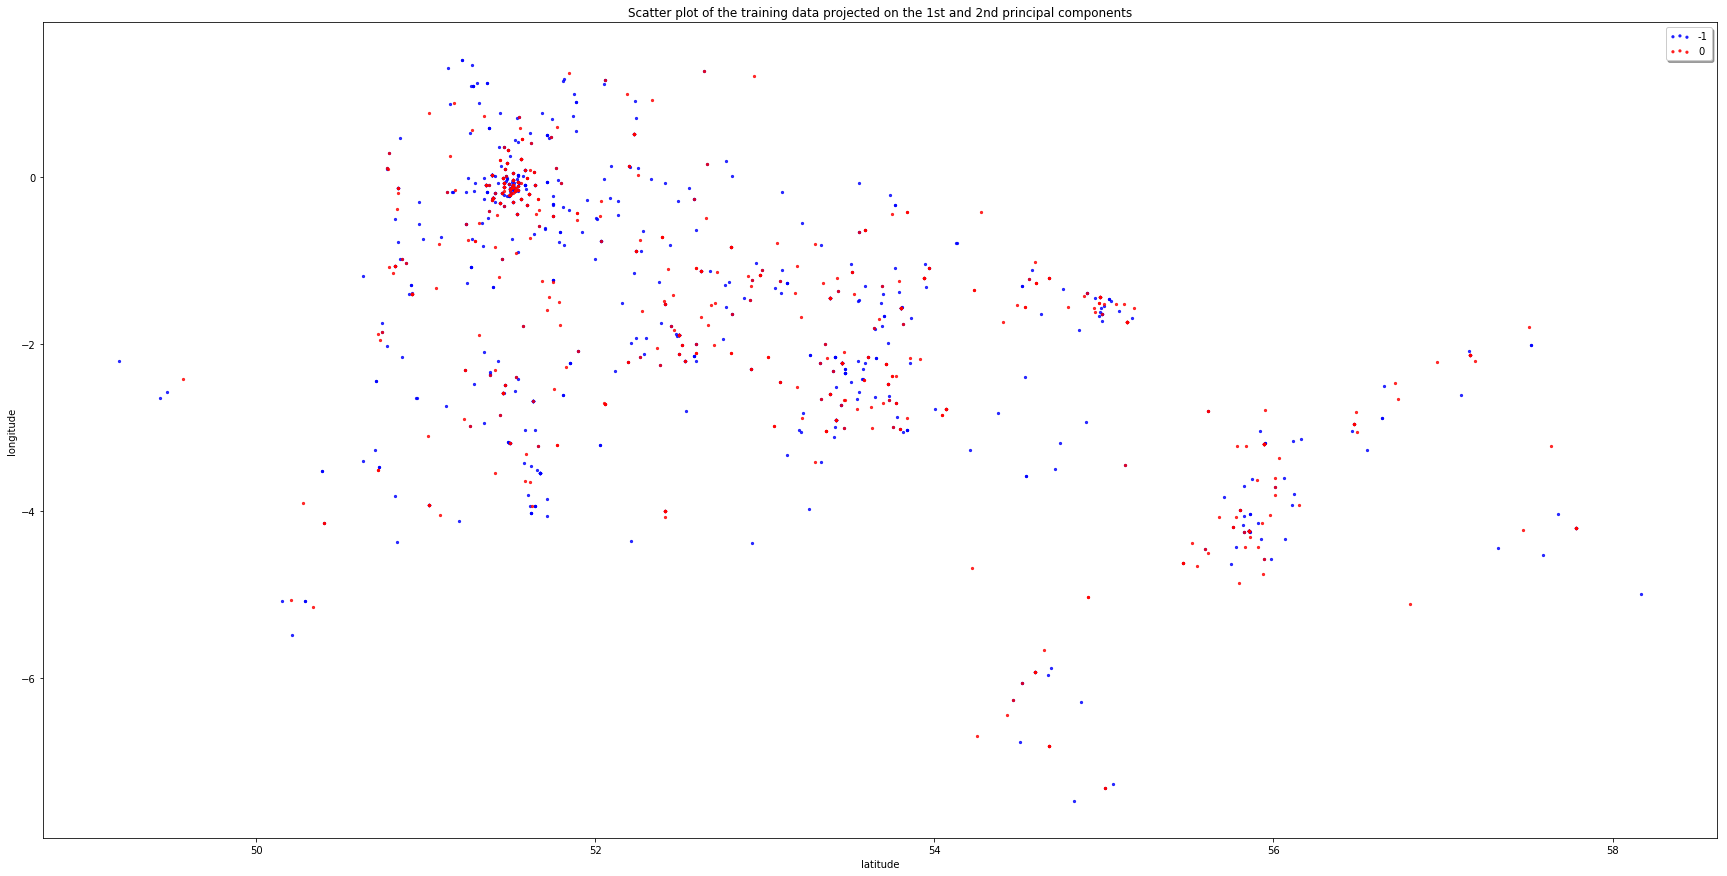

In [4]:
geo_array = np.array(combined_df[['location.latitude','location.longitude']])

print('\nRunning PCA again ...')
label_col = "properties.sentiment"
y_normal = combined_df[label_col].values.astype(np.int8)
target_names = np.unique(y_normal)

colors = ['blue', 'red']
plt.rcParams['figure.figsize'] = [30,15]

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(geo_array[y_normal == i, 0], geo_array[y_normal == i, 1], color=color, s=20,
                alpha=.8, label=target_name, marker='.')
plt.legend(loc='best', shadow=True, scatterpoints=3)
plt.title(
        "Scatter plot of the training data projected on the 1st "
        "and 2nd principal components")
plt.xlabel("latitude")
plt.ylabel("longitude")

#plt.savefig('pca-porto-01.png', dpi=150)
plt.show()

In [5]:
#encode country and verified cols
combined_df = encode_labels(combined_df,['author.properties.verified','location.country'])


encoded: author.properties.verified
encoded: location.country


In [6]:
no_body_df = normalize(encode_labels(combined_df.drop(['content.body','location.country','location.latitude','location.longitude'],axis=1),['author.properties.verified']))

print('\nRunning PCA again ...')
label_col = "properties.sentiment"
y_normal = no_body_df[label_col].values.astype(np.int8)

colors = ['blue', 'red']

n_comp = len(no_body_df.drop([label_col],axis=1).columns)

print(f'There were {n_comp} components to begin with: {", ".join(no_body_df.drop([label_col],axis=1).columns)}')
target_names = np.unique(y_normal)
pca = PCA(n_components=n_comp, svd_solver='full', random_state=1001)
X_pca = pca.fit_transform(no_body_df.drop([label_col],axis=1).values)
print('Explained variance: %.4f' % pca.explained_variance_ratio_.sum())

encoded: author.properties.verified

Running PCA again ...
There were 3 components to begin with: author.properties.friends, author.properties.status_count, author.properties.verified
Explained variance: 1.0000


Individual variance contributions:
0.5444343185734773
0.4118780176549874
0.043687663771535316


Text(0.5,1,'Scatter plot of the training data projected on the 1st and 2nd principal components')

Text(0.5,0,'Principal axis 1 - Explains 54.4 % of the variance')

Text(0,0.5,'Principal axis 2 - Explains 41.2 % of the variance')

Correlation with sentiment: 
 ---------------------
author.properties.friends: 0.024300949979256373
author.properties.status_count: 0.03636783031129115
author.properties.verified: 0.03886120752344499


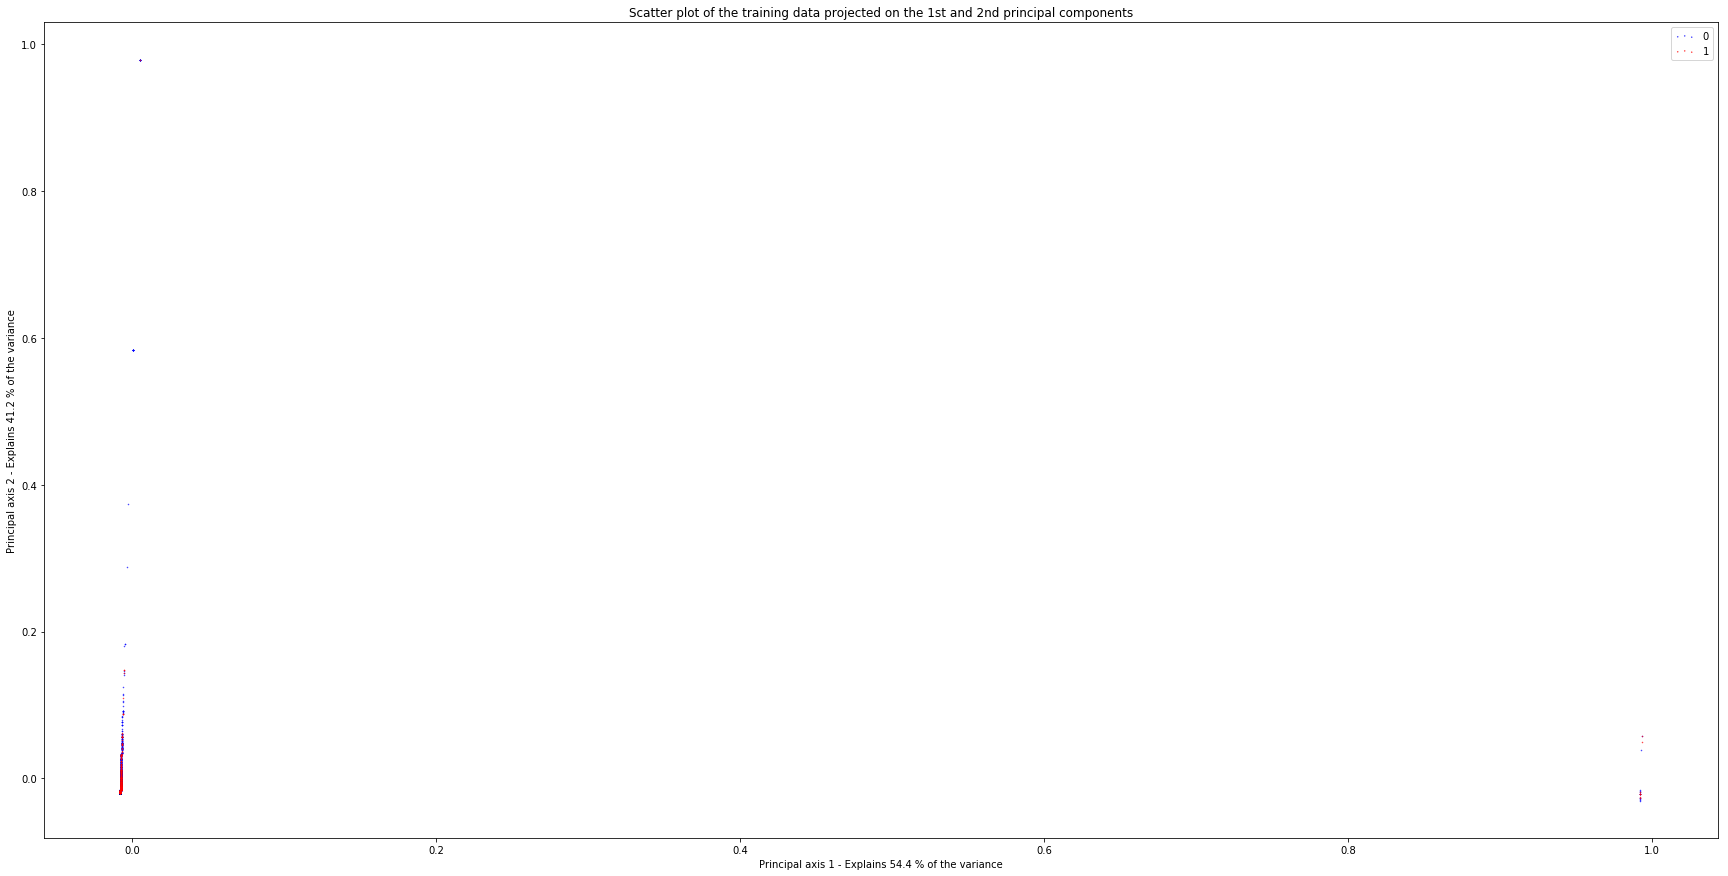

In [7]:
print('Individual variance contributions:')
for j in range(n_comp):
    print(pca.explained_variance_ratio_[j])

colors = ['blue', 'red']
plt.rcParams['figure.figsize'] = [30,15]

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_pca[y_normal == i, 0], X_pca[y_normal == i, 1], color=color, s=1,
                alpha=.8, label=target_name, marker='.')
plt.legend(loc='best', shadow=False, scatterpoints=3)
plt.title(
        "Scatter plot of the training data projected on the 1st "
        "and 2nd principal components")
plt.xlabel("Principal axis 1 - Explains %.1f %% of the variance" % (
        pca.explained_variance_ratio_[0] * 100.0))
plt.ylabel("Principal axis 2 - Explains %.1f %% of the variance" % (
        pca.explained_variance_ratio_[1] * 100.0))

print("Correlation with sentiment: \n ---------------------")
for col in no_body_df.drop([label_col],axis=1):
    print(f"{col}: {no_body_df[col].corr(no_body_df[label_col])}")

plt.show()

It seems from this initial look, it cannot fully be determined with the sentiment is positive or negative based solely on metadata, therefore it will be necessary to analyse body of the tweets.

While the location data does not seem meaningful, these 3 features could add a little bit to the model.